# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
RND = 12345

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
df_labels = pd.read_csv('/datasets/faces/labels.csv')
(df_labels.shape)

(7591, 2)

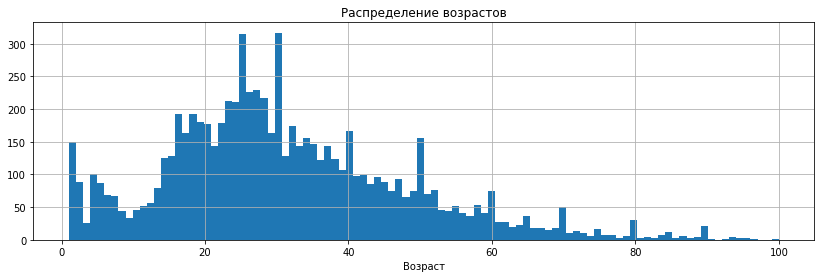

In [3]:
plt.figure(figsize=(14,4))
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
df_labels['real_age'].hist(bins=100)

По распределению видим, что больше всего представленных фотографий людей в возрасте 20 - 30 лет, также видим большое кол-во до 10 лет. <br>
Как мы увидим ниже нормализация лиц выполнена, так что предобработку фото делать в данном проекте не надо.

In [4]:
datagen = ImageDataGenerator(rescale=1./255) 
generator = datagen.flow_from_dataframe(dataframe=df_labels,
                                              directory='/datasets/faces/final_files',
                                              x_col="file_name",
                                              y_col="real_age",
                                              target_size=(250, 250),
                                              batch_size=16,
                                              shuffle=False,
                                              class_mode='raw',
                                              seed=RND)

Found 7591 validated image filenames.


In [5]:
features, target = next(generator)

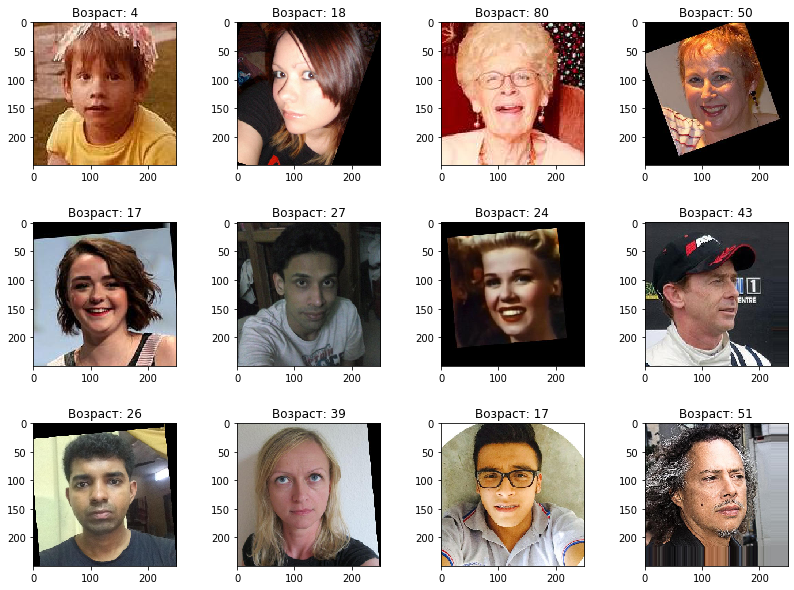

In [6]:
plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=0.4)
for age, img, i in zip(target[0:12], features[0:12], range(1, 15)):
    plt.subplot(3, 4, i)
    plt.imshow(img)
    plt.title("Возраст: " + str(age))

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

__КОД:__

```python

import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


def load_train(path):
    labels = pd.read_csv(path+'labels.csv')
    train_datagen = ImageDataGenerator(rescale= 1./255,
                                       validation_split=0.25)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(250, 250),
        batch_size=16,
        class_mode='raw',
        subset='training',
        horizontal_flip=True,
        seed=12345)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path+'labels.csv')
    test_datagen = ImageDataGenerator(rescale= 1./255,
                                      validation_split=0.25)
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(250, 250),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_datagen_flow

def create_model(input_shape):
    opt = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top= False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='softplus'))
    model.compile(optimizer=opt, loss='mean_squared_error',metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=14,
               steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model


```

<div style="background: #e1e5e5; padding: 20px; border: 2px black; border-radius: 20px;">
    <font size=5 color='black' face="Courier New"> <b><u>OUTPUT:</u></b></font>
   <br><br>

<font color="blue" face="Courier New">
Train for 356 steps, validate for 119 steps <br>
Epoch 1/14 <br>
2021-06-08 23:06:45.644968: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10 <br>
2021-06-08 23:06:45.994640: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7 <br>
356/356 - 55s - loss: 201.7780 - mae: 10.3644 - val_loss: 598.9925 - val_mae: 19.4513 <br>
Epoch 2/14 <br>
356/356 - 45s - loss: 69.2615 - mae: 6.3638 - val_loss: 183.3621 - val_mae: 10.2869 <br>
Epoch 3/14 <br>
356/356 - 45s - loss: 39.5354 - mae: 4.8609 - val_loss: 76.9793 - val_mae: 6.7624 <br>
Epoch 4/14 <br>
356/356 - 45s - loss: 26.3814 - mae: 3.9801 - val_loss: 70.9396 - val_mae: 6.3355 <br>
Epoch 5/14 <br>
356/356 - 45s - loss: 19.2172 - mae: 3.4054 - val_loss: 70.8024 - val_mae: 6.4966 <br>
Epoch 6/14 <br>
356/356 - 45s - loss: 15.1808 - mae: 3.0027 - val_loss: 79.8785 - val_mae: 6.6377 <br>
Epoch 7/14 <br>
356/356 - 45s - loss: 12.8945 - mae: 2.7516 - val_loss: 69.4556 - val_mae: 6.3709 <br>
Epoch 8/14 <br>
356/356 - 45s - loss: 10.4251 - mae: 2.4308 - val_loss: 66.2608 - val_mae: 6.2057 <br>
Epoch 9/14 <br>
356/356 - 45s - loss: 10.2020 - mae: 2.4058 - val_loss: 70.1456 - val_mae: 6.2410 <br>
Epoch 10/14 <br>
356/356 - 45s - loss: 10.4685 - mae: 2.4364 - val_loss: 66.2569 - val_mae: 6.2353 <br>
Epoch 11/14 <br>
356/356 - 45s - loss: 8.8547 - mae: 2.2872 - val_loss: 67.5477 - val_mae: 6.2241 <br>
Epoch 12/14 <br>
356/356 - 45s - loss: 8.7673 - mae: 2.2567 - val_loss: 79.1424 - val_mae: 6.6656 <br>
Epoch 13/14 <br>
356/356 - 46s - loss: 8.8452 - mae: 2.2439 - val_loss: 71.8357 - val_mae: 6.4602 <br>
Epoch 14/14 <br>
356/356 - 45s - loss: 8.8363 - mae: 2.2499 - val_loss: 63.7619 - val_mae: 5.9996 <br>
<font color="red" face="Courier New">
    WARNING:tensorflow:sample_weight modes were coerced from <br>
  ... <br>
    to   <br>
  ['...'] <br></font>
119/119 - 11s - loss: 63.7619 - mae: 5.9996 <br>
<b>Test MAE: 5.9996</b> <br>
</font>

## Анализ обученной модели

__Цель достигнута, MAE модели не больше 8__ <br>
Обучение модели было проведено на 14 эпохах и показало метрику __MAE = 5.9996__, что считается хорошим результатом. Предыдущие попытки приводили к тому, что с 15 эпохи, судя по всему, происходило переобучение, так как метрика становилась хуже.

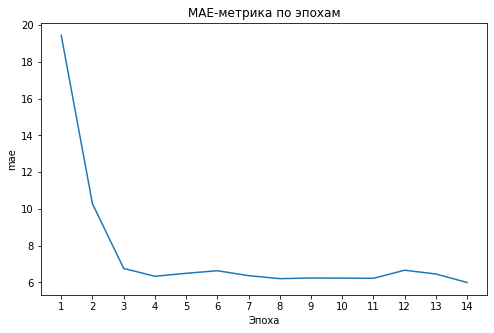

In [7]:

mae=[19.4513,10.2869,6.7624,6.3355,6.4966,6.6377,6.3709,6.2057,6.2410,6.2353,6.2241,6.6656,6.4602,5.9996]
epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.figure(figsize=(8,5))
plt.title('MAE-метрика по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('mae')
plt.xticks(epoch)
plt.plot(epoch, mae)
